## IMPORTAMOS LAS PRIMERAS LIBRERIAS

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leemos los archivos csv y preparamos los dataframe para su posterior trabajo

In [58]:
energia_renovable=pd.read_csv('./datos/energia renovable mundial.csv') # %% USADO EN EL ANTERIOR EDA
generacion_eolica= pd.read_csv('./datos/generacion eolica.csv')  # TWH USADO EN EL ANTERIOR EDA/ 
generacion_solar=pd.read_csv('./datos/generacion eolica.csv')  ### TWh USADO EN EL ANTERIOR EDA

coches_electricos=pd.read_csv('./datos/coches electricos.csv')   ### DATOS %  ANTERIOR EDA

solar_porcentaje=pd.read_csv('./datos/share-electricity-solar.csv')   ### DATOS %  NUEVO DATAFRAME - PENDIENTE TRABAJAR
eolico_porcentaje=pd.read_csv('./datos/share-electricity-wind.csv')   ### DATOS %  NUEVO DATAFRAME - PENDIENTE TRABAJAR
hydro_porcentaje=pd.read_csv('./datos/hydro-share-energy.csv')   ### DATOS %  NUEVO DATAFRAME - PENDIENTE TRABAJAR
installed_geo=pd.read_csv('./datos/installed-geothermal-capacity.csv') ## DATOS GWH, HAY QUE SACAR PRODUCCION EUROPEA(DATOS INTERNET) Y CREAR NUEVAS COLUMNAS 

### Dejamos en comentarios los DF con las columnas que nos interesan. De vez en cuando abriremos alguna para recordar número de años, pais,etc.. 
- Algún dataframe nuevo, necesitará fijarse que tienen los otros 

In [614]:
#solar_porcentaje[solar_porcentaje['Entity']=='European Union (27)']
#eolico_porcentaje[eolico_porcentaje['Entity']=='European Union (27)']
#hydro_porcentaje[hydro_porcentaje['Entity']=='European Union (27)']
#installed_geo[installed_geo['Entity']=='Europe'] #.unique() #.head()  #unique()
#generacion_solar[generacion_solar['Entity']=='European Union (27)']

# Metemos la produccion geotermica en Europa 
## Tenemos datos de GWh, tenemos que obtener el % para trabajar con los otros dataframe
- Limpiamos el dataframe y nos quedamos con los datos de Europa (borramos datos columnas y la dejamos en dos para que sea fácil trabajar la regresión lineal)
- Cogemos de internet los datos de producción eléctrica en Europa por años 
- Metemos dos columnas nuevas para obtener el porcentaje con los datos de internet
- Dejamos el dataframe listo para trabajar con los otros dataframe

- Sacamos los datos significativos del dataframe

In [615]:
display(installed_geo.info())
display(installed_geo.head())
display(installed_geo['Entity'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               758 non-null    object 
 1   Code                 576 non-null    object 
 2   Year                 758 non-null    int64  
 3   Geothermal Capacity  758 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ KB


None

,Entity,Code,Year,Geothermal Capacity
0,Africa,NaN,1990,45.0
1,Africa,NaN,1995,45.0
2,Africa,NaN,2000,65.3
3,Africa,NaN,2001,65.3
4,Africa,NaN,2002,65.3


array(['Africa', 'Asia Pacific', 'CIS', 'Chile', 'China', 'Costa Rica',
       'Croatia', 'El Salvador', 'Ethiopia', 'Europe', 'France',
       'Germany', 'Guatemala', 'Honduras', 'Iceland', 'Indonesia',
       'Italy', 'Japan', 'Kenya', 'Mexico', 'New Zealand', 'Nicaragua',
       'North America', 'Other Europe', 'Other South & Central America',
       'Papua New Guinea', 'Philippines', 'Portugal', 'Russia',
       'South & Central America', 'Turkey', 'United States', 'World'],
      dtype=object)

In [616]:
Euro_geo=installed_geo[installed_geo['Entity']=='Europe']
comodin= Euro_geo
#Euro_geo

### NECESITAMOS METER MÁS COLUMNAS Y TENEMOS QUE INTERCALAR AÑOS DESDE 1990, NO ESTÁN TODOS LOS AÑOS

## Preparamos los dataframe por separado solar,eolico,hydro y geo 
Trabajamos en ese orden, crearemos la variable Euro_solar, Euro_eolico, Euro_hydro y Euro_geo
Quitaremos las columnas Entity, Code y el nuevo index será Year (para el caso de Geo, hay que meter más años)
Los dataframe irán desde 1990
No usaré el inplace=True, para que cada vez que pruebe cosas no me de error. En su lugar usaré variables

### 1º DF SOLAR

In [617]:
Euro_solar=solar_porcentaje[solar_porcentaje['Entity']=='European Union (27)']
Euro_solar
Euro_solar=Euro_solar.drop(['Code', 'Entity'],  axis=1) 

Euro_solar = Euro_solar[Euro_solar['Year']>=1990]
#Euro_solar=Euro_solar.set_index('Year')
#Euro_solar

### 2º DF EOLICO

In [618]:
Euro_eolico=eolico_porcentaje[eolico_porcentaje['Entity']=='European Union (27)']
Euro_eolico=Euro_eolico.drop(['Code', 'Entity'],  axis=1) 
display(Euro_eolico.info())
Euro_eolico = Euro_eolico[Euro_eolico['Year']>=1990]
#Euro_eolico=Euro_eolico.set_index('Year')
#Euro_eolico

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 2070 to 2107
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  38 non-null     int64  
 1   Wind (% electricity)  38 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 912.0 bytes


None

### 3º DF HYDROELECTRIO
- Nos falta el dato de Hydro del 2022, la producción Mundial ha subido un 9,7%, mientras que en Europa prácticamente igual (ha desdendido) 
- Metemos el valor de la última fila ó len(df)

In [619]:
Euro_hydro=hydro_porcentaje[hydro_porcentaje['Entity']=='European Union (27)']
Euro_hydro=Euro_hydro.drop(['Code', 'Entity'],  axis=1) 

Euro_hydro = Euro_hydro[Euro_hydro['Year']>=1990]
nuevo_dato=[2022, 5.2]
Euro_hydro.loc[len(Euro_hydro)]=nuevo_dato
Euro_hydro['Year']=Euro_hydro['Year'].astype(int)
#Euro_hydro=Euro_hydro.set_index('Year')
#Euro_hydro

# 4º DF GEOTERMICA 
    - Nos faltan datos intercalados en años
    - Nos faltan datos de los dos últimos años que queremos trabajar
    - Tenemos columnas con Nan, sin embargo son códigos.
    - Tenemos todos los países del mundo (filtrar a Europa)
    - Tenemos capacidad instalada, necesitamos % para ello hay que calcular instalación total y sacar una nueva columna con %

### Primero: vamos a calcular el % de Geotermica a nivel mundial por años, para ello usamos las referencias de generación y % instalado para calcular el total
    - Usamos la eólica. Las energía: solar, hydro también serían válidas 
    - descargamos los datos de generación eólica y filtramos a Europa y apartir de 1990, creamos una nueva variable
    - preparamos lo mismo con los % eólicos mismos años países 
    - creamos una nueva variable (merge de dos data frame) y podemos realizar un to_csv para crear un nuevo archivo

In [620]:
generacion_eolica['Entity'].unique()

array(['Afghanistan', 'Africa', 'Africa (BP)', 'Africa (Ember)',
       'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (Ember)', 'Asia Pacific (BP)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (BP)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic',
       'Central America (BP)', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Africa (BP)', 'Ecuador', 'Egypt

In [621]:
generacion_eolica['Year'].unique
gen=generacion_eolica[ generacion_eolica['Year']>=1990]
gen=gen[gen['Entity']=='European Union (27)']
#gen.drop(columns=['Code','Entity'],inplace=True)

In [622]:
#gen=gen.set_index('Year')
display(gen.head())
display(Euro_eolico.head())

,Entity,Code,Year,Electricity from wind (TWh)
2600,European Union (27),NaN,1990,0.770460
2601,European Union (27),NaN,1991,0.971028
2602,European Union (27),NaN,1992,1.502048
2603,European Union (27),NaN,1993,2.067399
2604,European Union (27),NaN,1994,2.634625


,Year,Wind (% electricity)
2075,1990,0.033880
2076,1991,0.041897
2077,1992,0.065210
2078,1993,0.089738
2079,1994,0.112631


Creamos el dataframe eo_merge con la columna de producció total, nos quedaría limpiar el dataframe de geotermia y unirlas

In [623]:
eo_merge= pd.merge(gen, Euro_eolico, on='Year')
eo_merge
## NECESITAMOS UNA NUEVA COLUMNA EN LA QUE SACAMOS LA PRODUCCIÓN TOTAL 
for i in range(len(eo_merge)):
   eo_merge['Produccion Total TWh']= eo_merge['Electricity from wind (TWh)']*100/eo_merge['Wind (% electricity)']
#eo_merge



In [624]:
#eo_merge

Limpiamos el dataframe de geotermia

In [625]:
Euro_geo=installed_geo[installed_geo['Entity']=='Europe']
Euro_geo=Euro_geo.drop(['Code', 'Entity'],  axis=1) 
display(Euro_geo.info())

#Euro_geo=Euro_geo.set_index('Year')


<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 205 to 227
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 23 non-null     int64  
 1   Geothermal Capacity  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 552.0 bytes


None

## Tenemos ya un DF del que hemos sacado producción total. 
 ### metemos la columna de la geotérmica y sacamos el porcentaje.

Para ello tenemos que crear una columna de 33 datos en una de 23 podemos meter 10 columnas de valor cero con lo que el DF quedaría del mismo tamaño
Y luego ya crearíamos la nueva columna (meter una serie de 1990 a 2022)

In [626]:
Euro_geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 205 to 227
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 23 non-null     int64  
 1   Geothermal Capacity  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 552.0 bytes


### METEMOS MÁS FILAS CON VALORES CERO PARA TENER LA MISMA DIMENSION 

metos los datos a partir del final, len(del dataframe) para no sobreescribir

## Meto los años que faltan con un for. 

Ademas metemos en cada posición el valor float('nan'), si ponemos valor 0, luego no servirían fillna

In [627]:
k=1991
i=0 ## el index empieza por cero
for j in range(4):
    nuevos_datos=[k,float('nan')]
    k=k+1
    Euro_geo.loc[len(Euro_geo)+i]=nuevos_datos
    i=i+1


In [628]:
k=1996
i=1### valor uno porque si no me sobreescribe el último valor 
for j in range(4):
    nuevos_datos=[k,float('nan')]
    k=k+1
    Euro_geo.loc[len(Euro_geo)+i]=nuevos_datos
    i=i+1
Euro_geo.set_index(pd.RangeIndex(start=1, stop=len(Euro_geo)+1, step=1), inplace=True)


In [629]:

k=2021
i=0 ### pongo cero ya que son los últimos vlores 
for j in range(2): 
    nuevos_datos=[k, float('nan')]
    k=k+1
    Euro_geo.loc[len(Euro_hydro)+i]=nuevos_datos
    i=i+1

In [630]:
Euro_geo = Euro_geo.sort_values(by='Year')
Euro_geo= Euro_geo[['Year','Geothermal Capacity']]

Rellenamos valores de capacidad de producción (método interpolación)

In [631]:
Euro_geo['Geothermal Capacity'].interpolate(method='linear', limit_direction='forward', axis = 0, inplace=True)

In [632]:
#Euro_geo.to_csv('Euro_geo.csv', index=True)
#prueba=pd.read_csv('./Euro_geo.csv')

Limpiamos el dataframe de los valores geo para hacer un merge con el dataframe anterior y finalmente obtener los valores % de geo y poder tener datos para trabajar el modelo

In [633]:
prueba = prueba.sort_values(by='Year')
prueba= prueba[['Year','Geothermal Capacity']]
#prueba.set_index(pd.RangeIndex(start=1, stop=len(Euro_geo)+1, step=1), inplace=True)
prueba['Year']=prueba['Year'].astype(int)
#prueba

Ya tenemos Euro_geo con 33 columnas. Ordenamos por año
Por seguridad creo un csv con estos datos, así cada vez que haya que hacer restart, si da problemas. Importamos el csv

In [634]:
#prueba.to_csv('Euro_geo.csv', index=True)
prueba=pd.read_csv('./Euro_geo.csv')
#prueba


In [635]:
prueba= prueba[['Year','Geothermal Capacity']]
#prueba

Metemos la columna del % de producción (hay que tener en cuenta los TWh a GWh, dividir entre 1000)

In [636]:
merge_geo_porcentaje= pd.merge(eo_merge, prueba, on='Year')
## NECESITAMOS UNA NUEVA COLUMNA EN LA QUE SACAMOS LA PRODUCCIÓN TOTAL 
for i in range(len(merge_geo_porcentaje)):
   merge_geo_porcentaje['% Geo']= merge_geo_porcentaje['Geothermal Capacity']/merge_geo_porcentaje['Produccion Total TWh']
   merge_geo_porcentaje['% Geo']=merge_geo_porcentaje['% Geo']/10 # *100 y /1000 para tener la misma unidad y en valor %

#display(merge_geo_porcentaje)

Metemos en un dataframe las columnas de % eolico, % hidro, % solar y quitamos el resto

In [637]:
merge_geo_porcentaje=merge_geo_porcentaje[['Year','Wind (% electricity)','% Geo']]
#merge_geo_porcentaje

In [638]:
tot=pd.merge(merge_geo_porcentaje,Euro_hydro, on='Year')
#tot

In [639]:
total_porcentajes=pd.merge(tot,Euro_solar, on='Year')
#total_porcentajes

## Guardamos en un nuevo CSV todos los valores de % de producción renvoable 

In [640]:
#total_porcentajes.to_csv('././datos/total_porcentajes_renovables.csv')

#### Graficamos para ver puntos de partida

In [641]:
total_porcentajes.columns

Index(['Year', 'Wind (% electricity)', '% Geo',
       'Hydro (% equivalent primary energy)', 'Solar (% electricity)'],
      dtype='object')

Text(0.5, 1.0, '% de renovables/total en Europa')

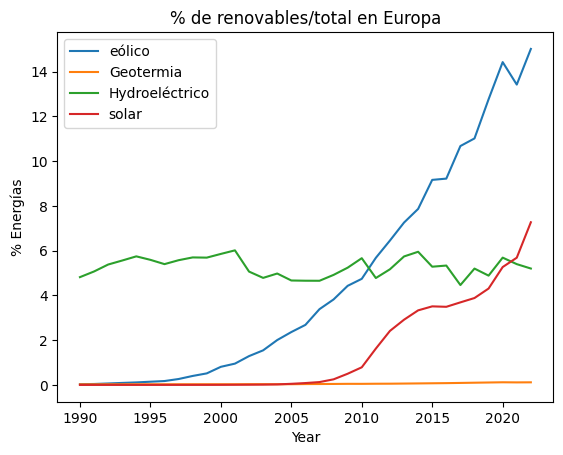

In [642]:

sns.lineplot(data=total_porcentajes, x='Year',y='Wind (% electricity)', label='eólico')
sns.lineplot(data=total_porcentajes, x='Year', y='% Geo', label='Geotermia')
sns.lineplot(data=total_porcentajes, x='Year', y='Hydro (% equivalent primary energy)', label='Hydroeléctrico')
sns.lineplot(data=total_porcentajes, x='Year', y='Solar (% electricity)', label='solar')
plt.ylabel("% Energías")
plt.title('% de renovables/total en Europa')

## Vamos a preparar el dataframe de coches eléctricos. 
 - Elegir los datos 
 - Limpiar datos, columnas 
 - Agregar filas ya que los valores anteriores a 2010 son cero

In [643]:
####### coches eléctricos

coches=pd.read_csv('./datos/coches electricos.csv')
coches_EV=coches[(coches['parameter']=='EV sales share') & (coches['region']=='EU27')]
coches_EV = coches_EV[['year','value']]
coches_EV.rename(columns={'year': "Year"}, inplace=True)
coches_EV.rename(columns={'value': "% coches"}, inplace=True)
#coches_EV

- Agregamos filas con datos

In [644]:
k=1990
i=0
for j in range(20): 
    nuevos_datos=[k, 0]
    k=k+1
    coches_EV.loc[i]=nuevos_datos
    i=i+1
coches_EV=coches_EV.sort_values('Year')

## Creo un segundo dataframe con la columna de porcentajes incluida. 
    - Crear segundo dataframe con un Merge
    - Guardarlo en un csv por seguridad

In [4]:
Total_porcentajes_con_coches=pd.merge(total_porcentajes,coches_EV, on='Year')

NameError: name 'total_porcentajes' is not defined

In [646]:
#Total_porcentajes_con_coches.to_csv('./datos/total_porcentajes_con_coches.csv')

In [59]:
Total_porcentajes_con_coches=pd.read_csv('./datos/total_porcentajes_con_coches.csv')

# Graficamos todos los datos incluidos los coches, este es el punto de partida 
    - continuación anterior dataframe, incluyendo, energía Geotérmica, Hydroeléctricya y el historial total de los coches

Text(0.5, 1.0, '% Energías Limpias en Europa')

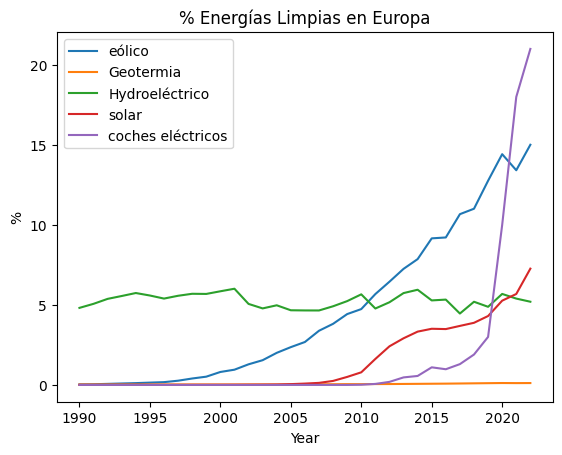

In [6]:
sns.lineplot(data=Total_porcentajes_con_coches, x='Year',y='Wind (% electricity)', label='eólico')
sns.lineplot(data=Total_porcentajes_con_coches, x='Year', y='% Geo', label='Geotermia')
sns.lineplot(data=Total_porcentajes_con_coches, x='Year', y='Hydro (% equivalent primary energy)', label='Hydroeléctrico')
sns.lineplot(data=Total_porcentajes_con_coches, x='Year', y='Solar (% electricity)', label='solar')
sns.lineplot(data=Total_porcentajes_con_coches, x='Year', y='% coches', label='coches eléctricos')
plt.ylabel("%")
plt.title('% Energías Limpias en Europa')

In [7]:
Total_porcentajes_con_coches.columns
Total=Total_porcentajes_con_coches.drop('Unnamed: 0', axis=1)
Total

,Year,Wind (% electricity),% Geo,Hydro (% equivalent primary energy),Solar (% electricity),% coches
0,1990,0.033880,0.027158,4.815282,0.000506,0.000
1,1991,0.041897,0.027453,5.068409,0.000582,0.000
2,1992,0.065210,0.028433,5.378329,0.000959,0.000
3,1993,0.089738,0.029238,5.557762,0.001232,0.000
4,1994,0.112631,0.029594,5.743726,0.001269,0.000
5,1995,0.144038,0.029505,5.588112,0.001612,0.000
6,1996,0.174131,0.029196,5.396534,0.001638,0.000
7,1997,0.264190,0.029670,5.571887,0.001991,0.000
8,1998,0.401443,0.029687,5.696200,0.002306,0.000
9,1999,0.515983,0.030039,5.686824,0.002674,0.000


# A partir de aquí podemos empezar a trabajar en modelos de predicción. 

- Importamos las liberías
- Declaramos el target, en este caso serían los años (objetivos por año): 2050 emisión cero o 100%

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [61]:
model= LinearRegression()

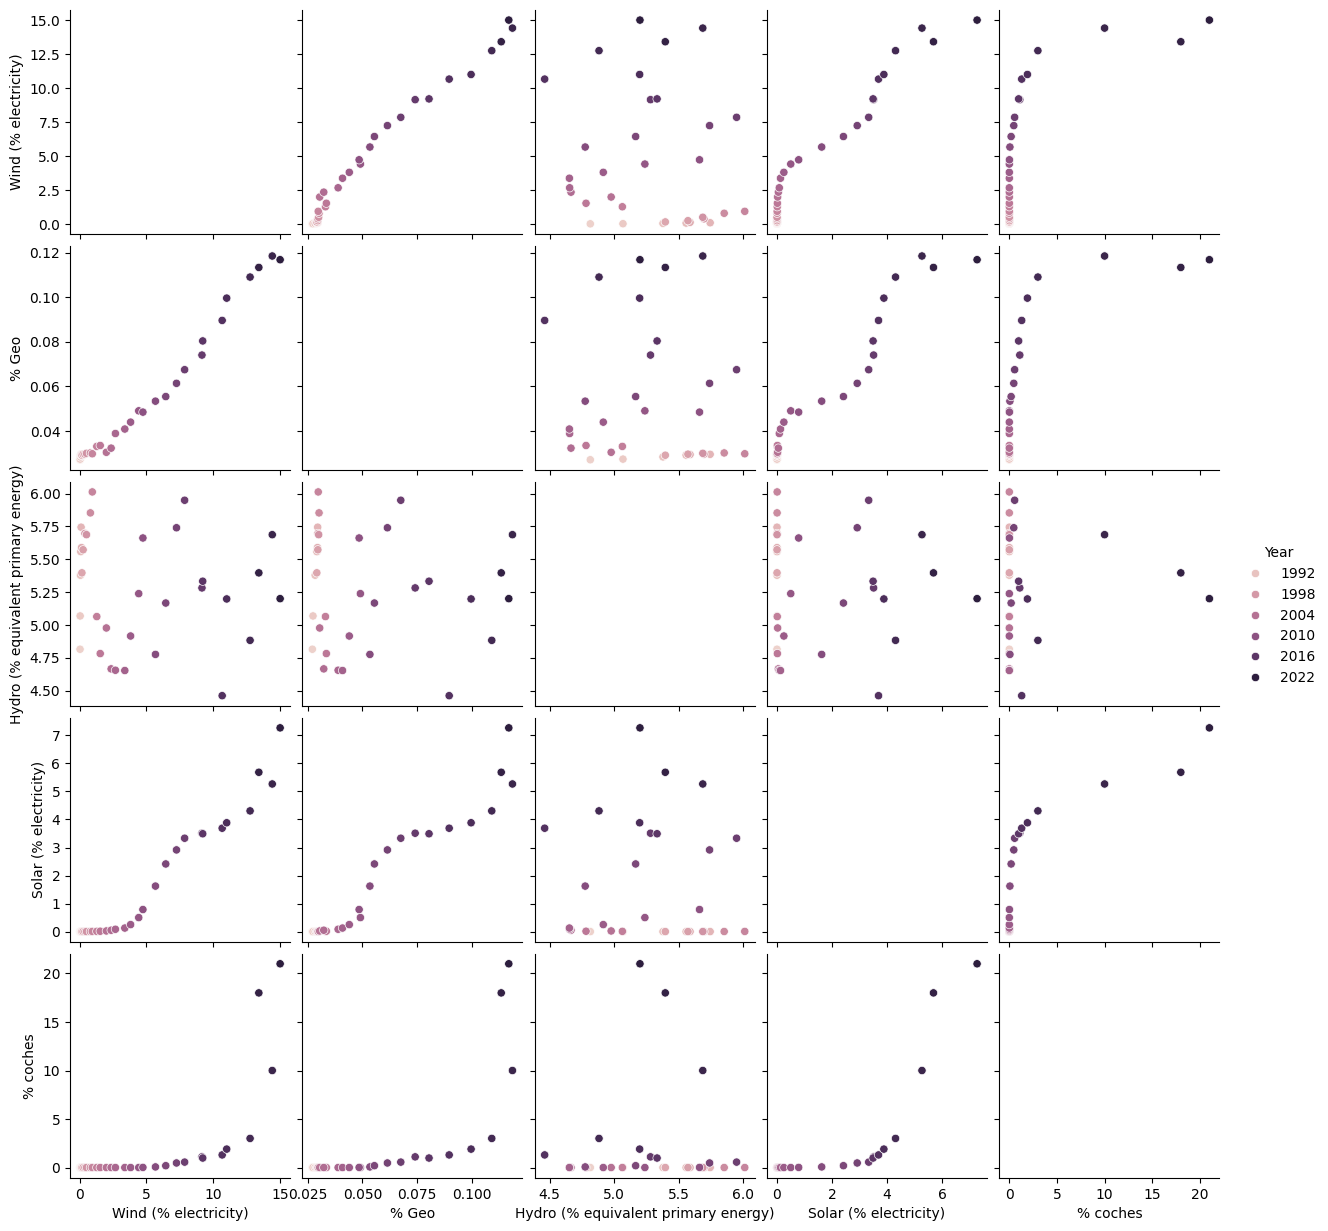

In [62]:

sns.pairplot(Total, hue='Year')


- Viendo el pairplot: 
    - Regresión lineal
    - Regresión polinómica 
    - Meter un pipeline con algún modelo más y pasar un Gridsearch 

<Axes: >

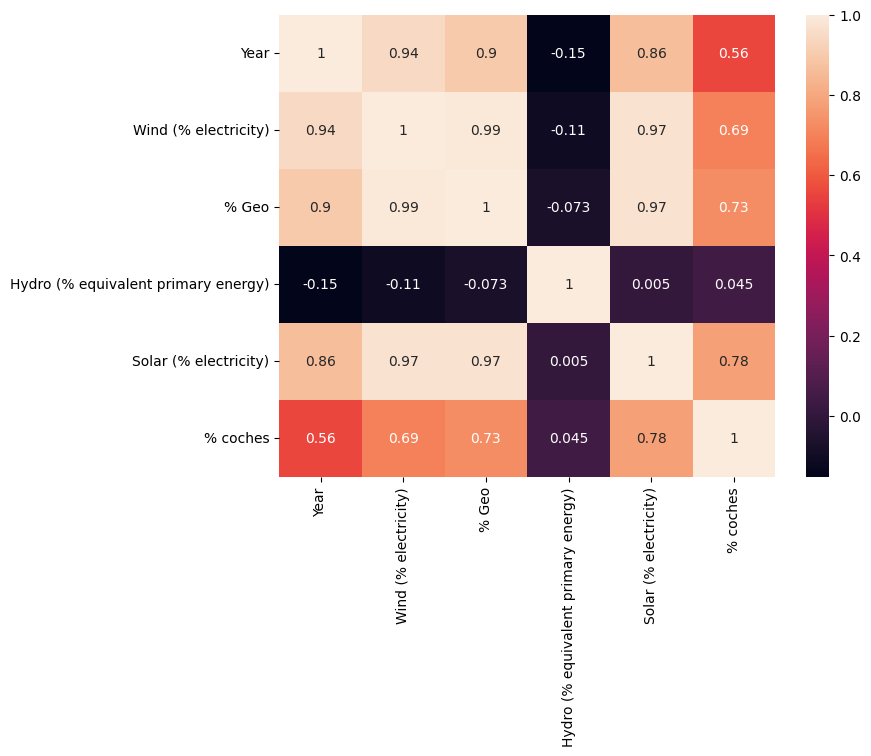

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(Total.corr(), annot=True)

Hacemos un split con los parámetros

In [64]:
X=Total_porcentajes_con_coches[['Wind (% electricity)', '% Geo','Hydro (% equivalent primary energy)', 'Solar (% electricity)','% coches']]
Y=Total_porcentajes_con_coches['Year']

In [13]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [65]:
display(X_test.shape)
display(X_train.shape)
display(Y_test.shape)

(20, 5)

(112, 5)

(20,)

Entrenamos el modelo

In [66]:
model.fit(X_train, Y_train)
print(model.intercept_)
print(model.coef_)

1998.8930222049823
[ 6.05161035e+00 -4.48658775e+02  1.47442669e+00 -3.48523155e+00
  1.09111431e-01]


Creamos un dataframe para ver los coeficientes

In [67]:
coeff_df = pd.DataFrame(model.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Wind (% electricity),6.051610
% Geo,-448.658775
Hydro (% equivalent primary energy),1.474427
Solar (% electricity),-3.485232
% coches,0.109111


In [68]:
prediccion=model.predict(X_test)
prediccion
X_test.shape

(20, 5)

In [70]:

datos={ 'Wind (% electricity)': [15,20,25,40,55], '% Geo': [0.11,0.11,0.10,0.10,0.9],'Hydro (% equivalent primary energy)':[5,5,4.5,4.55,3.5], 'Solar (% electricity)':[20,24,28,43,65],'% coches':[20,24,34,56,79]}
valores=pd.DataFrame(datos)
valores.shape
display(valores)

,Wind (% electricity),% Geo,Hydro (% equivalent primary energy),Solar (% electricity),% coches
0,15,0.11,5.00,20,20
1,20,0.11,5.00,24,24
2,25,0.10,4.50,28,34
3,40,0.10,4.55,43,56
4,55,0.90,3.50,65,79


In [71]:
pre=model.predict(valores)
pre
    

array([1980.16444325, 1996.9180145 , 2018.07562874, 2059.04548349,
       1715.17893984])

# LAS PRIMERAS CONCLUSIONES DE ESTE MODELO, ES QUE SON POCOS DATOS Y LAS DOS COLUMNAS CON CRECIMIENTO HORIZONTAL, PUEDEN FASTIDIAR CUALQUIER MODELO
# VAMOS A DAR MÁS PRECISIÓN METIENDO MÁS VALORES REALES DENTRO DEL AÑO (TRIMESTRES, EN FLOAT SON 0.25)
# EN UNA ECUACIÓN MATEMÁTICA LINEAL ESTA INTERPOLACIÓN NO AFECTA. 
    ### TOCA EVALUAR SI MERECE LA PENA MANTENER LA GEOTERMIA Y LOS DATOS HIDROELECTRICOS PARA HACER CALCULOS. A PARTIR DE ESTE PUNTO PROBAMOS ALGÚN OTRO MODELO. Y 
    ### SI ES NECESARIO QUITAMOS ESAS DOS COLUMNAS, EL MODELO TRABAJARÁ MEJOR

In [72]:
renovables=pd.read_csv('./datos/total_extrapolado.csv')

In [73]:

renovables = renovables.drop('Unnamed: 0', axis=1)
renovables.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 132 non-null    float64
 1   Wind (% electricity)                 132 non-null    float64
 2   % Geo                                132 non-null    float64
 3   Hydro (% equivalent primary energy)  132 non-null    float64
 4   Solar (% electricity)                132 non-null    float64
 5   % coches                             132 non-null    float64
dtypes: float64(6)
memory usage: 6.3 KB


<Axes: >

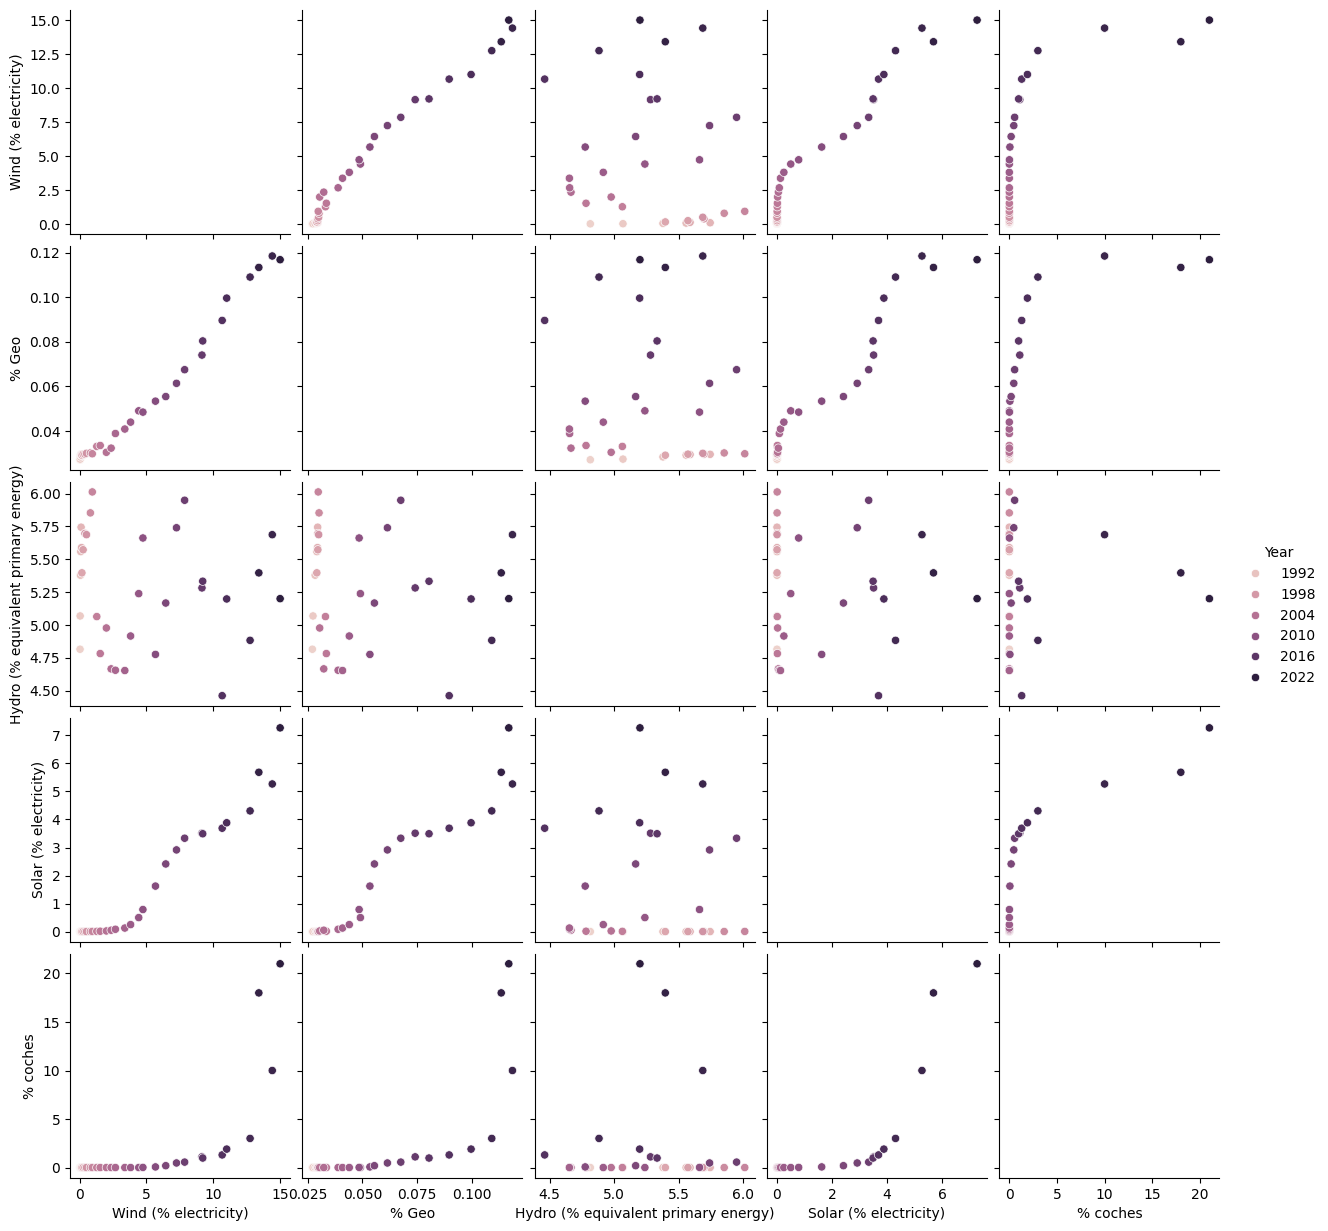

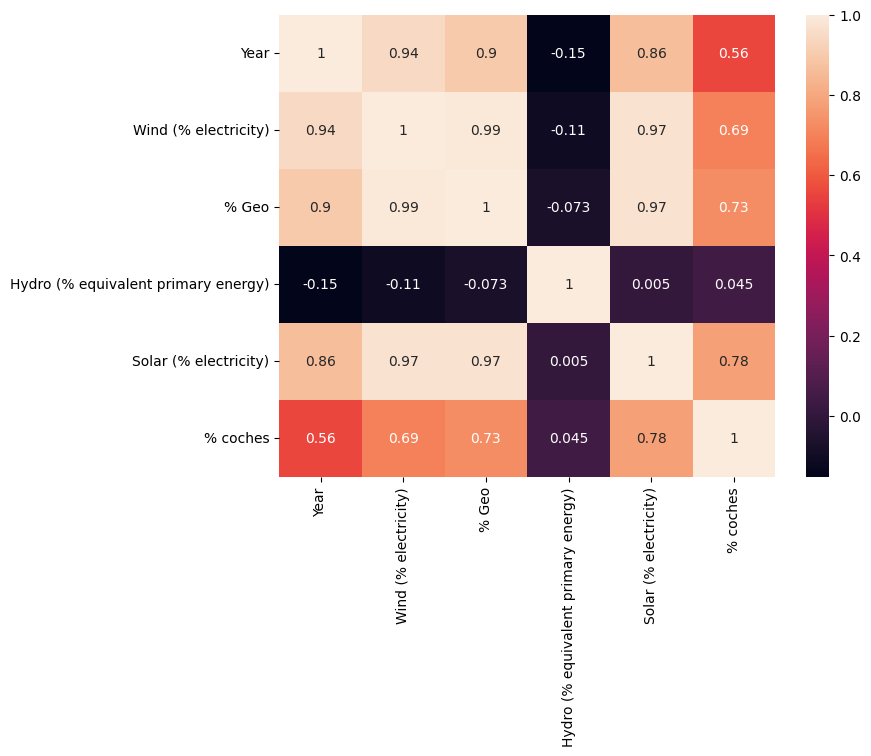

In [74]:

sns.pairplot(Total, hue='Year')
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(Total.corr(), annot=True)

In [75]:
X=renovables[['Wind (% electricity)', '% Geo','Hydro (% equivalent primary energy)', 'Solar (% electricity)','% coches']]
Y=renovables['Year']

In [92]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [77]:
display(X_test.shape)
display(X_train.shape)
display(Y_test.shape)

(20, 5)

(112, 5)

(20,)

In [93]:
model.fit(X_train, Y_train)
print(model.intercept_)
print(model.coef_)
coeff_df = pd.DataFrame(model.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

1998.8208807713086
[ 5.95271646e+00 -4.39037464e+02  1.45808560e+00 -3.38684515e+00
  9.71033342e-02]


,Coefficient
Wind (% electricity),5.952716
% Geo,-439.037464
Hydro (% equivalent primary energy),1.458086
Solar (% electricity),-3.386845
% coches,0.097103


In [94]:
prediccion=model.predict(X_test)
prediccion
X_test.shape

###### PREDICCION CON LOS TRAIN PARA LUEGO CALCULAR LOS ERRORES
prediccion_train=model.predict(X_train)
prediccion_train 


array([2013.47067785, 2013.43271484, 1994.11835179, 1994.61820303,
       2020.5987355 , 2007.95391504, 1994.90214629, 2011.32927567,
       2017.50490429, 1999.98448848, 1994.80646354, 2010.45021059,
       2007.35786005, 1994.88450858, 1999.91774515, 2005.78156006,
       2012.57791656, 1995.97964612, 2021.69172235, 2011.04342436,
       1994.57821341, 1996.60268547, 2006.56971005, 1995.04777069,
       2016.74765874, 1995.48464391, 2013.50864086, 2013.54660387,
       2001.29677165, 1994.44556565, 2007.65588754, 2023.00124517,
       1998.41671424, 1999.52130903, 1996.85875976, 1994.86921704,
       2010.01067805, 1996.73072261, 2020.49446692, 1994.52511091,
       1999.81865366, 2008.8052639 , 2015.11535479, 2015.7361776 ,
       1994.56488354, 1994.68095653, 2021.90025952, 1994.33393271,
       1994.8686305 , 1997.94007512, 2008.54997002, 2019.29721149,
       1994.48533828, 2010.64377699, 2016.38421589, 2014.43576375,
       2002.37746509, 1999.75289875, 2016.68147782, 1999.70840

In [112]:

datos={ 'Wind (% electricity)': [15,20,25,40,55,55], '% Geo': [0.11,0.12,0.12,0.13,0.13,0.11],'Hydro (% equivalent primary energy)':[5,5,4.5,4.55,3.5,4], 'Solar (% electricity)':[7,14,28,43,65,68],'% coches':[20,24,34,56,79,100]}
valores=pd.DataFrame(datos)
valores.shape
display(valores)

,Wind (% electricity),% Geo,Hydro (% equivalent primary energy),Solar (% electricity),% coches
0,15,0.11,5.00,7,20
1,20,0.12,5.00,14,24
2,25,0.12,4.50,28,34
3,40,0.13,4.55,43,56
4,55,0.13,3.50,65,79
5,55,0.11,4.00,68,100


In [113]:
pre=model.predict(valores)
pre
    

array([2025.34208526, 2027.3957902 , 2009.98553092, 2046.29240355,
       2061.77494393, 2063.16337058])

### CALCULAMOS LOS ERRORES

In [114]:
from sklearn import metrics

print('SAC LOS VALORES MAE Y MSE de la parte de test')
print('MAE:', metrics.mean_absolute_error(Y_test, prediccion))
print('MSE:', metrics.mean_squared_error(Y_test, prediccion))

print('SAC LOS VALORES MAE Y MSE de la parte de train')

### para ello tengo que sacar la prediccion del train y ver los errores, esto sirve para el overfitting y underfitting 
prediccion_train=model.predict(X_train)

print('MAE train:', metrics.mean_absolute_error(Y_train, prediccion_train))
print('MSE train:', metrics.mean_squared_error(Y_train, prediccion_train))
print( metrics.r2_score(Y_train, model.predict(X_train)))
print('r2_score de test', metrics.r2_score(Y_test, model.predict(X_test)))

SAC LOS VALORES MAE Y MSE de la parte de test
MAE: 1.0862711480586027
MSE: 1.7975022125430178
SAC LOS VALORES MAE Y MSE de la parte de train
MAE train: 1.2588503133021882
MSE train: 2.607270829000092
0.9716680429957084
r2_score de test 0.978017369424568


PROBAMOS CON EL MODELO DE REGRESSION POLINOMICA Y FINALMENTE HAREMOS UN PIPELINE DE REGRESION LINEAL Y REGRESION POLINOMICA SIN LAS COLUMNAS 
DE GEOTERMIA E HIDROELECTRICA

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [99]:

poly_feats_d2 = PolynomialFeatures(degree= 2)
poly_feats_d2.fit(X_train)

X_train_poly_d2 = poly_feats_d2.transform(X_train)
X_test_poly_d2 = poly_feats_d2.transform(X_test)

In [100]:
lr_d2 = LinearRegression()
lr_d2.fit(X_train_poly_d2, Y_train)

LinearRegression()

In [101]:
print('Train: ')
print('-' * 30)
print('MSE: ', mean_squared_error(Y_train, lr_d2.predict(X_train_poly_d2)))
print('R2: ', r2_score(Y_train, lr_d2.predict(X_train_poly_d2)))
print('\n')
print('Test: ')
print('-' * 30)
print('MSE: ', mean_squared_error(Y_test, lr_d2.predict(X_test_poly_d2)))
print('R2: ', r2_score(Y_test, lr_d2.predict(X_test_poly_d2)))

Train: 
------------------------------
MSE:  0.2512076434341537
R2:  0.9972702474657551


Test: 
------------------------------
MSE:  0.3629013916547571
R2:  0.995561881831138


In [102]:
print('SAC LOS VALORES MAE ')
print( 'Test:')
print('MAE:', metrics.mean_absolute_error(Y_test, lr_d2.predict(X_test_poly_d2)))
print( 'Train:')
print('MAE train:', metrics.mean_absolute_error(Y_train, lr_d2.predict(X_train_poly_d2)))

SAC LOS VALORES MAE 
Test:
MAE: 0.474040932299431
Train:
MAE train: 0.3347524009665341


In [116]:
valores

,Wind (% electricity),% Geo,Hydro (% equivalent primary energy),Solar (% electricity),% coches
0,15,0.11,5.00,7,20
1,20,0.12,5.00,14,24
2,25,0.12,4.50,28,34
3,40,0.13,4.55,43,56
4,55,0.13,3.50,65,79
5,55,0.11,4.00,68,100


In [122]:
x_test = valores
x_test_poly = poly_feats_d2.transform(x_test)
y_pred = lr_d2.predict(x_test_poly)
y_pred

array([ 2055.99044351,  1774.98599843,  -399.59295421, -2032.18982524,
       -7665.4378791 , -9910.53396549])

# VAMOS A HACER LA REGRESION LINEAL CON LOS EL DATAFRAME QUITANDO LOS VALORES DE LAS DOS COLUMNAS QUE NO TIENEN CRECIMIENTO. 
AL SER HORIZONTAL HAY QUE TENER ENCUENTA QUE CUALQUIER VALOR QUE LE DEMOS POR ARRIBA O POR ABAJO NOS PUEDE DAR DATOS IRREALES

In [123]:
renovables=pd.read_csv('./datos/total_extrapolado.csv')

In [128]:
renovables_modelos= renovables[['Year','Wind (% electricity)','Solar (% electricity)','% coches' ]]
X= renovables_modelos[['Wind (% electricity)','Solar (% electricity)','% coches' ]]
Y=renovables_modelos['Year']

In [147]:
renovables_modelos.tail()

,Year,Wind (% electricity),Solar (% electricity),% coches
127,2021.75,14.611969,6.871428,20.25
128,2022.00,15.010179,7.267374,21.00
129,2022.25,15.010179,7.267374,21.00
130,2022.50,15.010179,7.267374,21.00
131,2022.75,15.010179,7.267374,21.00


<Axes: >

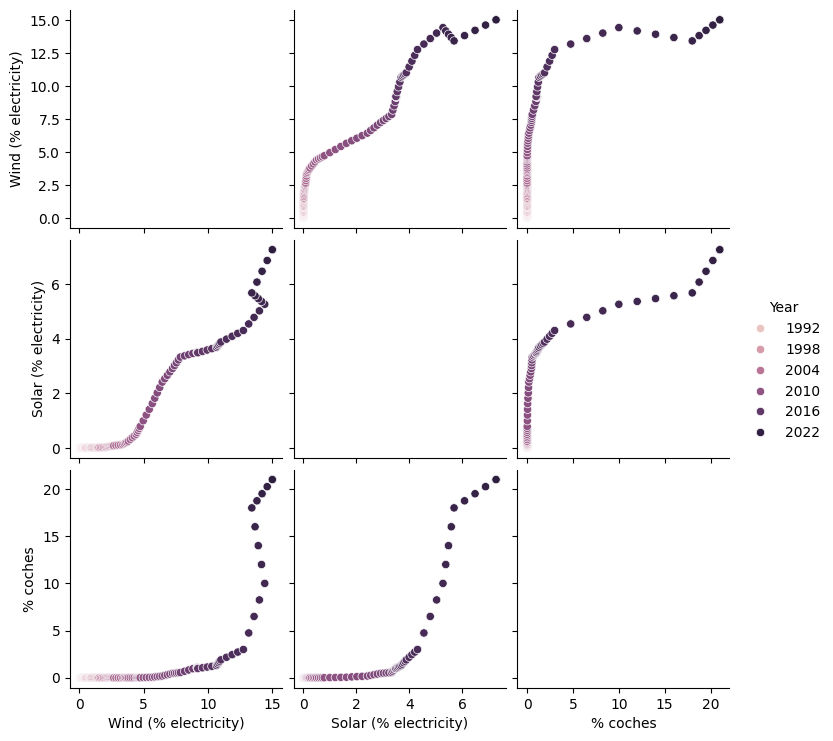

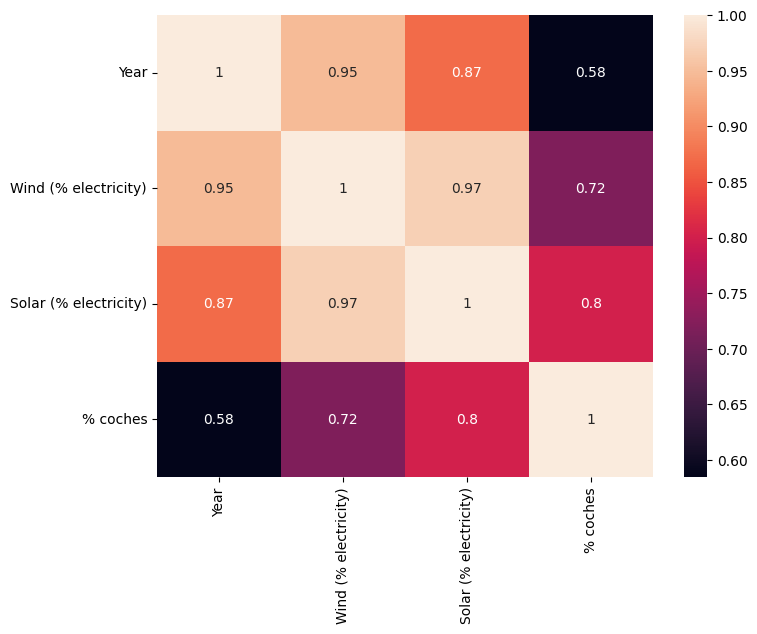

In [140]:

sns.pairplot(renovables_modelos, hue='Year')
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(renovables_modelos.corr(), annot=True)

In [131]:
model_lr= LinearRegression()

In [132]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [133]:
model_lr.fit(X_train, Y_train)
print(model_lr.intercept_)
print(model_lr.coef_)
coeff_df = pd.DataFrame(model_lr.coef_,
                        X.columns,
                        columns=['Coefficient'])

1995.7757265802304
[ 3.27851377 -3.15589329 -0.10609898]


In [134]:
adi=model_lr.predict(X_test)
adi

array([2002.27397482, 2009.15405803, 1996.21739845, 1996.97233736,
       2008.71157443, 2024.12426619, 2001.90465678, 2019.82366816,
       2004.30379859, 1996.48852129, 1998.87426102, 1996.56205828,
       1999.69374227, 1995.91124712, 2012.79761128, 2014.67798127,
       1997.45894562, 2008.93692778, 1998.41607753, 2003.83226027,
       1996.19192705, 1996.02626852, 1998.64516928, 1996.04615707,
       2018.9862901 , 2004.84576255, 2019.84726954])

In [ ]:
##### habría que calcular errores

In [193]:
data={ 'Wind (% electricity)': [15,35,48,55,62,73], 'Solar (% electricity)':[7,23,33,38,42,50],'% coches':[21,67,70,80,85,100]}
val=pd.DataFrame(data)
val.shape
display(val)


,Wind (% electricity),Solar (% electricity),% coches
0,15,7,21
1,35,23,67
2,48,33,70
3,55,38,80
4,62,42,85
5,73,50,100


In [194]:
ver=model_lr.predict(val)
ver

array([2020.63410155, 2030.82953126, 2041.57298052, 2047.68212068,
       2057.47764904, 2066.70266953])

# VARIAS FORMAS DE METER DATOS, SEGUN EL CASO. DEJAMOS EN COMENTARIOS
 - Con un for insertar en la columna el nuevo dato
 - ffill opcion coger el valor anterior y meter en el siguiente 
 - interpolate, método para interpolar

In [ ]:
'''
k=2022
i=0
for j in range(5): 
    nuevos_datos=[k, 0]
    k=k+1
    Euro_hydro.loc[len(Euro_hydro)+i]=nuevos_datos
    i=i+1
   
display(Euro_hydro)
#### INTERPOLATE: meter valores en una columna metodo interpolar (metodo, direccion y columna o fila)
#### FFILL COGEL VALOR ANTERIOR Y LO METE EN EL SIGUIENTE'''
'''df['€/kWh'].ffill(axis = 0, inplace= True)    COGE EL VALOR "ANTERIOR Y LO METE EN EL SIGUIETE 
df['temp_int'].ffill(axis= 0, inplace= True)
df['temp_ext'].interpolate(method='linear', limit_direction='forward', axis = 0, inplace=True)
df['kWh'].ffill(axis= 0, inplace= True)
df['kWh'].bfill(axis= 0, inplace= True)'''


'df[\'€/kWh\'].ffill(axis = 0, inplace= True)    COGE EL VALOR "ANTERIOR Y LO METE EN EL SIGUIETE \ndf[\'temp_int\'].ffill(axis= 0, inplace= True)\ndf[\'temp_ext\'].interpolate(method=\'linear\', limit_direction=\'forward\', axis = 0, inplace=True)\ndf[\'kWh\'].ffill(axis= 0, inplace= True)\ndf[\'kWh\'].bfill(axis= 0, inplace= True)'